In [99]:
# 최적화 경사하강법 변경 (BGD > SGD) 손실함수
sc = SGDClassifier(loss = 'log',
                  random_state = 493,
                  early_stopping= True, # 미 개선시 조기 종료
                  n_iter_no_change= 5, # 미 개선 상한
                  tol = 0.1)# 개선정도
sc.fit(train_ss, train_y)

print(sc.n_iter_)
print(sc.score(train_ss, train_y))
print(sc.score(test_ss, test_y))

7
0.8235294117647058
0.875


### svm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digit, target  = load_digits(as_frame=True, return_X_y=True)
digit_img = load_digits()['images']

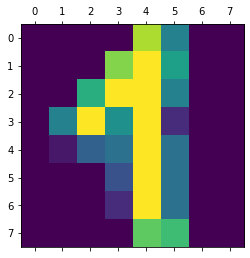

In [2]:
plt.matshow(digit_img[70])
plt.show()

In [3]:
digit_img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
print(f'{digit.shape}, {target.shape} ')

(1797, 64), (1797,) 


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(digit, target,
                                                   random_state=493,
                                                   stratify = target)
ss = StandardScaler()
ss.fit(train_x)
train_ss = ss.transform(train_x)
test_ss = ss.transform(test_x)


In [6]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)

svc_ss = SVC()
svc_ss.fit(train_ss, train_y)

print('비 정규화 --------------')
print(svc.score(train_x, train_y))
print(svc.score(test_x, test_y))

print('   정규화 --------------')
print(svc_ss.score(train_ss, train_y))
print(svc_ss.score(test_ss, test_y))


비 정규화 --------------
0.9948032665181886
0.9866666666666667
   정규화 --------------
0.9970304380103935
0.98


###### 파라미터 튜닝

In [7]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [8]:
# from sklearn.model_selection import GridSearchCV
# param_range = [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
# param_grid = [
#     {'C': param_range, 'kernel': ['linear']},
#     {'C': param_range, 'gamma': param_range, 'kernel': ['rbf']}
# ]
# svc = SVC()
# gs = GridSearchCV(estimator=svc, 
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv = 10)
# gs.fit(train_x, train_y)

# print(gs.best_params_)

In [9]:
svc = SVC(C = 10, gamma=0.001, kernel = 'rbf')
svc.fit(train_x, train_y)

print('비 정규화 --------------')
print(svc.score(train_x, train_y))
print(svc.score(test_x, test_y))


비 정규화 --------------
1.0
0.9933333333333333


In [139]:
# # 정규화
# svc_ss = SVC()
# gs_ss = GridSearchCV(estimator=svc_ss, 
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv = 10)
# gs_ss.fit(train_ss, train_y)

# print(gs_ss.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [10]:
# svc_ss = gs_ss.best_estimator_
svc_ss = SVC(C = 10, gamma=0.01, kernel = 'rbf')
svc_ss.fit(train_ss, train_y)

print('비 정규화 --------------')
print(svc_ss.score(train_ss, train_y))
print(svc_ss.score(test_ss, test_y))


비 정규화 --------------
1.0
0.9822222222222222


### LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
max_iter = 3200
logit_model = LogisticRegression(max_iter = max_iter)
logit_model.fit(train_x, train_y)

logit_model_ss = LogisticRegression(max_iter = max_iter)
logit_model_ss.fit(train_ss, train_y)

print('비 정규화 --------------')
print(logit_model.score(train_x, train_y))
print(logit_model.score(test_x, test_y))

print('   정규화 --------------')
print(logit_model_ss.score(train_ss, train_y))
print(logit_model_ss.score(test_ss, test_y))


비 정규화 --------------
1.0
0.9733333333333334
   정규화 --------------
0.9985152190051967
0.9755555555555555


In [17]:
# from sklearn.model_selection import GridSearchCV
# param_range = [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
# param_grid = [
#     {'C': param_range}
# ]
# logit_model = LogisticRegression(max_iter = max_iter)
# gs = GridSearchCV(estimator=logit_model, 
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv = 10)
# gs.fit(train_x, train_y)

# print(gs.best_params_)

C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 0.01}


In [20]:
logit_model = LogisticRegression(max_iter = max_iter, C= 0.01)
logit_model.fit(train_x, train_y)

print('비 정규화 --------------')
print(logit_model.score(train_x, train_y))
print(logit_model.score(test_x, test_y))

비 정규화 --------------
0.9933184855233853
0.9755555555555555


In [18]:
# from sklearn.model_selection import GridSearchCV
# param_range = [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
# param_grid = [
#     {'C': param_range}
# ]
# logit_model_ss = LogisticRegression(max_iter = max_iter)
# gs_ss = GridSearchCV(estimator=logit_model_ss, 
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv = 10)
# gs_ss.fit(train_ss, train_y)

# print(gs_ss.best_params_)

{'C': 1}


In [19]:
logit_model_ss = LogisticRegression(max_iter = max_iter, C = 1)
logit_model_ss.fit(train_ss, train_y)

print('   정규화 --------------')
print(logit_model_ss.score(train_ss, train_y))
print(logit_model_ss.score(test_ss, test_y))


   정규화 --------------
0.9985152190051967
0.9755555555555555


In [29]:
test_img =digit.iloc[0:10]
print('비 정규화 --------------')
print('svc 예측 :', svc.predict(test_img))
print('logit 예측 :', logit_model.predict(test_img))

비 정규화 --------------
svc 예측 : [0 1 2 3 4 9 6 7 8 9]
logit 예측 : [0 1 2 3 4 9 6 7 8 9]


In [30]:
test_img = ss.transform(digit.iloc[0:10])
print('   정규화 --------------')
print('svc 예측 :', svc_ss.predict(test_img))
print('logit 예측 :', logit_model_ss.predict(test_img))

   정규화 --------------
svc 예측 : [0 1 2 3 4 9 6 7 8 9]
logit 예측 : [0 1 2 3 4 9 6 7 8 9]


In [ ]:
def draw_predict(model, img):
    plt.matshow(digit_img[70])
    plt.show()
    print('예측 값 :' model. predict(img))